In [1]:
import os
import sys
sys.path.append("../..")
import torch
import pandas as pd
import imagesize
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
from PIL import Image
from tqdm.notebook import tqdm
from src.transforms import make_patches,ImageResizer
from torchvision.transforms import ToTensor

In [2]:
tqdm.pandas()

In [3]:
ROI_LATEST = dotenv.get_key(dotenv.find_dotenv(), "DATA_DIR")
DATA_DIR = "/home/abdelnour/Documents/4eme_anne/S2/projet/data"
ROI_DATA_DIR = "/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset"

print(ROI_LATEST)
print(DATA_DIR)
print(ROI_DATA_DIR)

/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/BRACS_RoI/latest_version
/home/abdelnour/Documents/4eme_anne/S2/projet/data
/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset


In [4]:
DESCRIPTION_DF_PATH = os.path.join(ROI_DATA_DIR, "description_df.csv")
print(DESCRIPTION_DF_PATH)

/home/abdelnour/Documents/4eme_anne/S2/projet/data/roi-dataset/description_df.csv


In [6]:
def build_df(data_dir):

    splits = os.listdir(data_dir)
    
    df = {
        "path": [],
        "split": [],
        "category": [],
    }
    
    for split in splits:

        split_dir = os.path.join(data_dir, split)
        categories = os.listdir(split_dir)

        for category in categories:

            category_dir = os.path.join(split_dir,category)

            for roi in os.listdir(category_dir):
                roi_path = os.path.join(category_dir, roi)
                df["path"].append(roi_path)
                df["split"].append(split)
                df["category"].append(category)

    df = pd.DataFrame(df)
    df["size"] = df.path.apply(os.path.getsize)
    df["resolution"] = df.path.progress_apply(imagesize.get)
    df["width"] = df["resolution"].apply(lambda x : x[0])
    df["height"] = df["resolution"].apply(lambda x : x[1])

    mapper = {
        "0_N":"benign",
        "1_PB":"benign",
        "2_UDH":"benign",
        "3_FEA":"atypical",
        "4_ADH":"atypical",
        "5_DCIS":"malignant",
        "6_IC":"malignant"
    }

    df["label"] = df["category"].map(mapper)

    return df

In [9]:
df = None

if not os.path.exists(DESCRIPTION_DF_PATH):
    df = build_df(ROI_LATEST)
    df.to_csv(DESCRIPTION_DF_PATH,index=False)
else:
    df = pd.read_csv(DESCRIPTION_DF_PATH)
    df["resolution"] = df["resolution"].apply(
        lambda x : (int(x[1:-1].split(',')[0]),int(x[1:-1].split(',')[1]))
    )

  0%|          | 0/4543 [00:00<?, ?it/s]

In [10]:
df.head()

,path,split,category,size,resolution,width,height,label
0,/home/abdelnour/Documents/4eme_anne/S2/projet/...,val,4_ADH,4696840,"(1113, 1535)",1113,1535,atypical
1,/home/abdelnour/Documents/4eme_anne/S2/projet/...,val,4_ADH,8154723,"(1309, 2159)",1309,2159,atypical
2,/home/abdelnour/Documents/4eme_anne/S2/projet/...,val,4_ADH,1661839,"(752, 840)",752,840,atypical
3,/home/abdelnour/Documents/4eme_anne/S2/projet/...,val,4_ADH,2383103,"(922, 922)",922,922,atypical
4,/home/abdelnour/Documents/4eme_anne/S2/projet/...,val,4_ADH,15071731,"(1813, 3204)",1813,3204,atypical


/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='split', ylabel='count'>

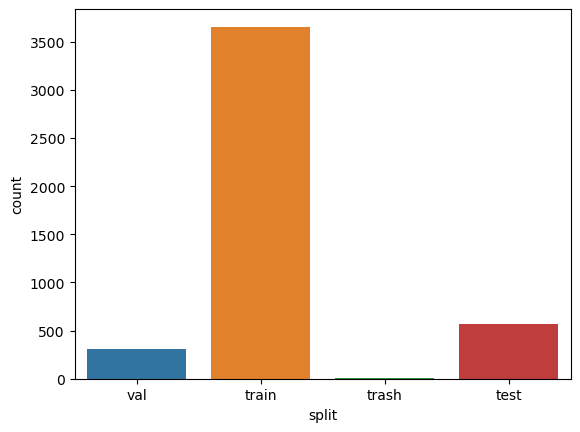

In [12]:
sns.countplot(data=df, x='split')

/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='category', ylabel='count'>

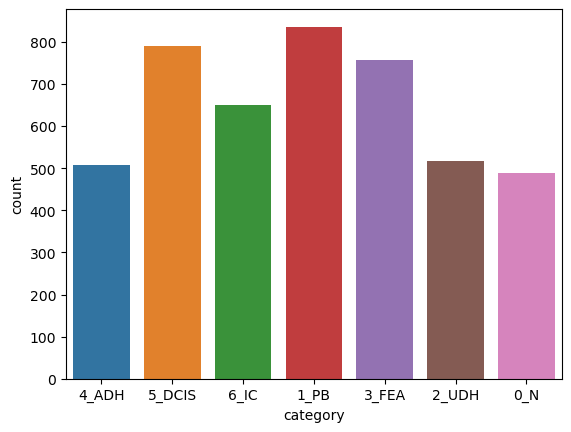

In [13]:
sns.countplot(data=df, x='category')

/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

<Axes: xlabel='category', ylabel='count'>

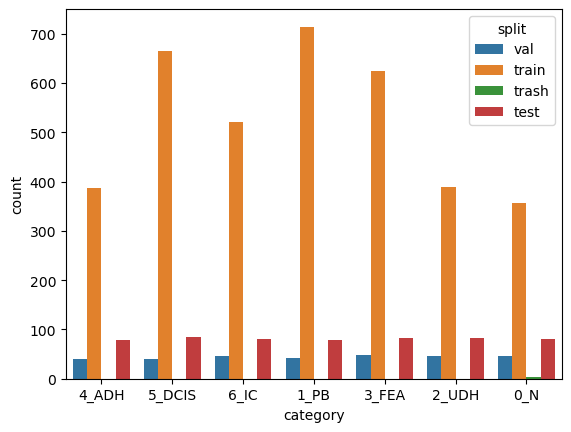

In [14]:
sns.countplot(data=df, x='category', hue='split')

/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/abdelnour/anaconda3/envs/project/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='count'>

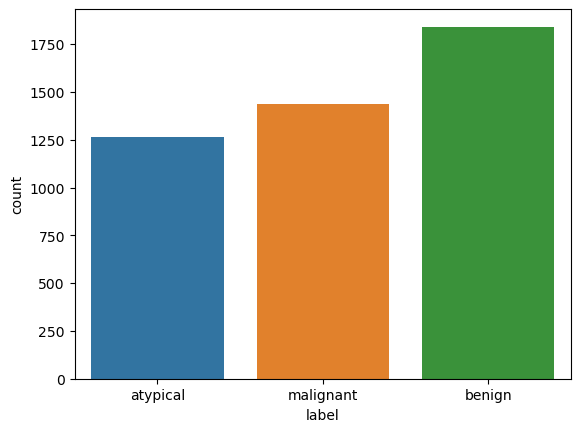

In [15]:
sns.countplot(data=df, x='label')

In [16]:
def load_image(infilename) :
    img = Image.open(infilename)
    return img

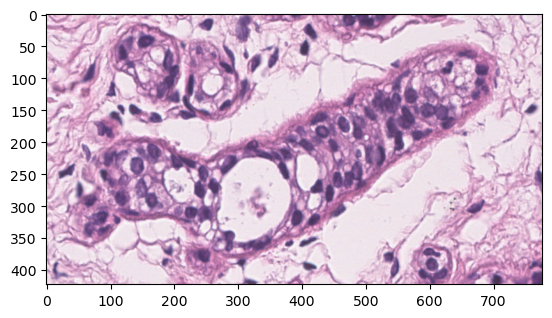

In [17]:
test_img = load_image(df.path.iloc[0])
plt.imshow(test_img)

## Image Patching

In [21]:
resizer = ImageResizer()
resized_img = resizer(test_img)
tensor_img = ToTensor().__call__(resized_img)
patches = make_patches(tensor_img, patch_height=224,patch_width=224)
print(f"langth = {len(patches)}, type = {type(patches)}")

langth = 6, type = <class 'list'>


In [37]:
def plot_paches(patches : list[torch.Tensor]) -> None:

    fig, axes = plt.subplots(nrows=len(patches))

    fig.set_size_inches(5,30)

    i = 0
    
    for cell in axes:
        cell.imshow(patches[i].permute(1,2,0))
        i += 1

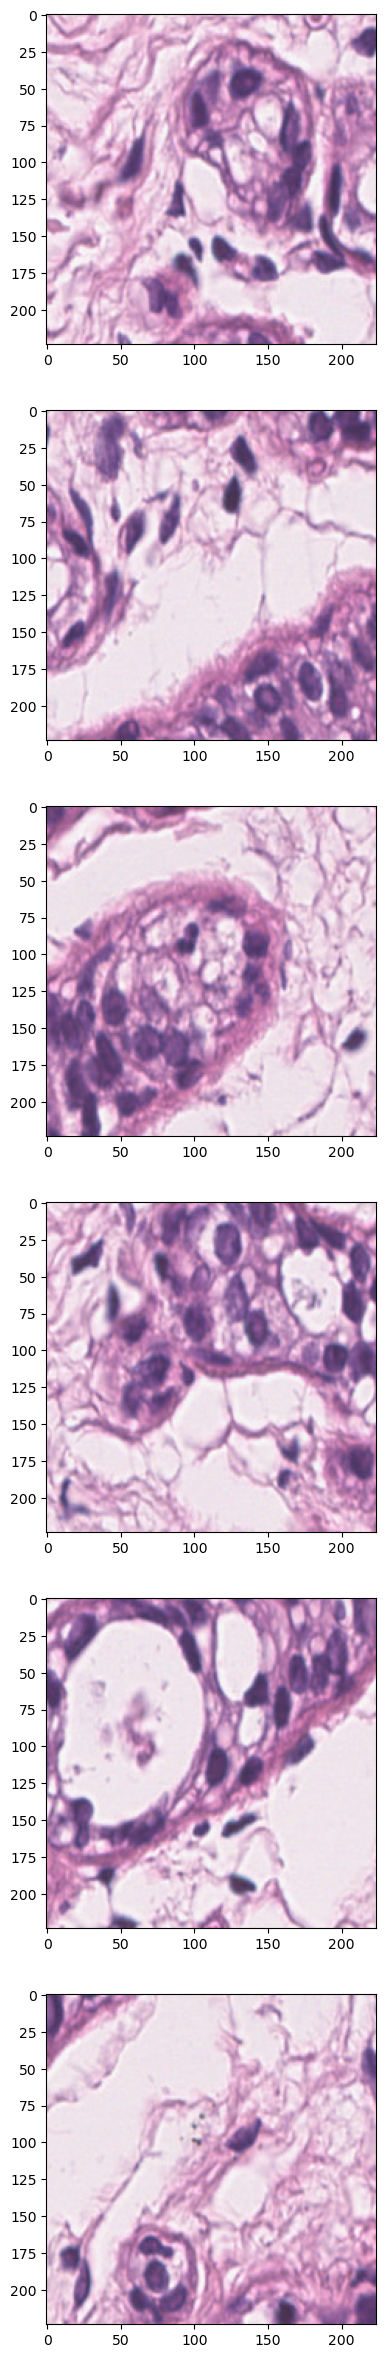

In [38]:
plot_paches(patches)